# 1. Project Background

Perusahaan pemasaran ingin menjalankan kampanye yang sukses, namun pasarnya kompleks dan dengan pilihan kampanye yang tepat, mereka dapat menghasilkan kampanye yang sukses. Jadi mereka biasanya  melakukan pengujian A/B. Kebanyakan orang akan dihadapkan pada iklan (kelompok uji). Dan sejumlah kecil orang (kelompok kontrol) akan melihat iklan layanan masyarakat (PSA) dengan ukuran dan lokasi yang sama dengan iklan tersebut.

# 2. Project Stages

## Tujuan dari experimental :

- Menentukan sebuah ads campaign apakah berpengaruh secara signifikan terhadap penjualan atau tidak.

## Metrics yang digunakan :

- Conversoin rate


## Define variants

- Control: Public Service Announcements (psa)
- Treatment: ads with more striking colors (ad)

## Define Hypothesis

- H0: tidak terdapat perbedaan yang signifikan dari implementasi ads terhadap conversion rate  
- H1: terdapat perbedaan yang signifikan antara grup control dan treatment akibat dari implementasi ads

# 3. Designing Experiments

##### 1. Randomization Unit
- UserID, karena merupakan unique value.

##### 2. Target of randomization unit
- Pengguna secara acak

##### 3. Sample Size
- Significant level: Tingkat signifikansi pada uji hipotesis, secara atau yang sering digunakan adalah 5% atau 0.05.
- Power Level: Probabilitas utk menolak hipotesis H0. Pada eksperimen kali ini menggunakan 0.08.
- Std of Population: Std pada populasi pada eksperimen kali ini adalah 0.07.
- Difference between control and treatment: Perusahaan telah melakukan rapat utk menentukan nilai Difference between control and treatment, yaitu sebesar 1%.

# 4. Running Experiment and Obtaining Data

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import numpy as np

In [257]:
df = pd.read_csv("marketing_AB.csv", index_col=0)
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


# 5. Analyzing & Interpreting Data

rename kolom yang memiliki spasi antar katanya

In [258]:
new_col = {
    'user id': 'user_id',
    'test group': 'test_group',
    'total ads': 'total_ads',
    'most ads day': 'most_ads_day',
    'most ads hour': 'most_ads_hour'
}

df = df.rename(columns=new_col)
df

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


Mendapat infomasi mengenai dataset

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


Melihat statistik deskriptif dari data

In [260]:
df.describe(include='all')

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
count,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,2,2,NaN,7,NaN
top,NaN,ad,False,NaN,Friday,NaN
freq,NaN,564577,573258,NaN,92608,NaN
mean,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [261]:
print(df["test_group"].value_counts())

test_group
ad     564577
psa     23524
Name: count, dtype: int64


Dari visualisasi dibawah ini terdapat perbedaan yang cukup signifikan antara jumlah grup control dan treatment

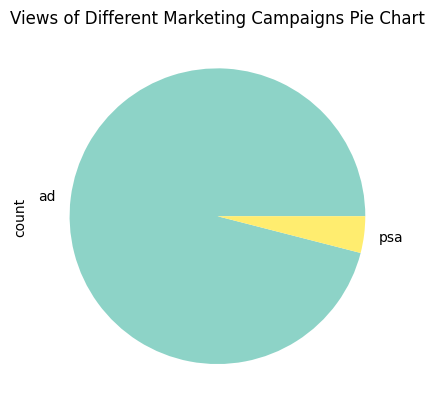

In [262]:
ax = df["test_group"].value_counts().plot(kind="pie", colormap="Set3")
ax.set_title('Views of Different Marketing Campaigns Pie Chart')
plt.show()

In [263]:
alpha = 0.05
power_level = 0.8
standard_deviation = 0.07
delta = 0.01

In [264]:
def sample_size_calculator(alpha, power_level, standard_deviation, delta):

    beta = 1 - power_level

    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(1 - beta)

    n = (2 * (z_alpha + z_beta)**2 * standard_deviation**2) / delta**2

    return int(n)


In [265]:
sampe_size = sample_size_calculator(alpha, power_level, standard_deviation, delta)
sampe_size

769

In [266]:
data_control = df[df['test_group'] == 'psa'].sample(sampe_size)
data_treatment = df[df['test_group'] == 'ad'].sample(sampe_size)

len(data_control), len(data_treatment)

(769, 769)

In [267]:
data = pd.concat([data_control, data_treatment])
data.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
329661,911149,psa,False,1,Wednesday,18
86022,913083,psa,False,9,Monday,11
552937,904874,psa,False,2,Tuesday,14
216416,907729,psa,False,16,Thursday,11
55664,909732,psa,False,71,Monday,16


In [268]:
print(data['test_group'].value_counts())

test_group
psa    769
ad     769
Name: count, dtype: int64


Cek ada tidaknya data yang kosong

In [269]:
data.isna().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

Cek ada tidaknya data yang duplikat

In [270]:
data.duplicated().sum()

0

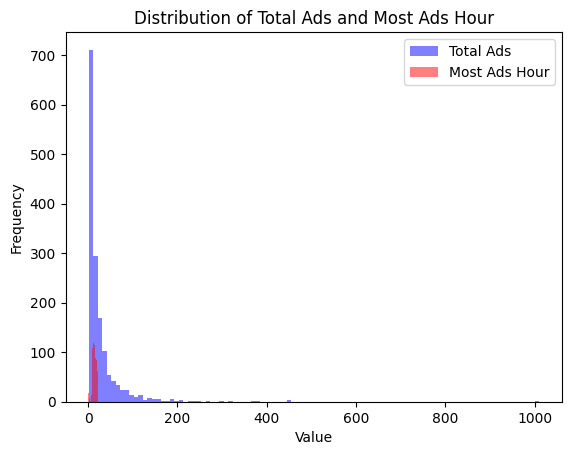

In [271]:
# Kolom "total ads"
plt.hist(data["total_ads"], bins=100, color="blue", alpha=0.5, label="Total Ads")

# Kolom "most ads hour"
plt.hist(data["most_ads_hour"], bins=24, color="red", alpha=0.5, label="Most Ads Hour")

# Menambahkan label sumbu x dan y, serta judul
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Total Ads and Most Ads Hour")

# Menambahkan legenda
plt.legend()

# Menampilkan histogram
plt.show()

In [272]:
n_user_control = data[data["test_group"] == "psa"]["user_id"].nunique()
n_user_treatment = data[data["test_group"] == "ad"]["user_id"].nunique()
# 769

n_converted_control = data[(data["test_group"] == "psa") & (data["converted"] == True)].shape[0]
n_converted_treatment = data[(data["test_group"] == "ad") & (data["converted"] == True)].shape[0]

print(f"jumlah user yang converted pada group control adalah sebanyak {n_converted_control} user id")
print(f"jumlah user yang converted pada group treatment adalah sebanyak {n_converted_treatment} user id")


jumlah user yang converted pada group control adalah sebanyak 19 user id
jumlah user yang converted pada group treatment adalah sebanyak 30 user id


In [273]:
# Menghitung total jumlah pengguna yang terlibat
total_user_impacted = n_user_control + n_user_treatment

# Menghitung nilai observed dan expected
observed = [n_user_control, n_user_treatment]
expected = [int(total_user_impacted / 2), int(total_user_impacted / 2)]

# Menampilkan hasil perhitungan
print(f"Total pengguna: {total_user_impacted}")
print(f"Observed: {observed}")
print(f"Expected: {expected}")

Total pengguna: 1538
Observed: [769, 769]
Expected: [769, 769]


In [274]:
cr_control = n_converted_control / n_user_control
cr_treatment = n_converted_treatment / n_user_treatment

print(f'Convert rate utk control: {cr_control}')
print(f'Convert rate utk treatment: {cr_treatment}')

Convert rate utk control: 0.0247074122236671
Convert rate utk treatment: 0.03901170351105332


In [275]:
diff = cr_treatment - cr_control

#### Barchart utk melihat perbandingan conversion rate antara control dan treatment

<Axes: >

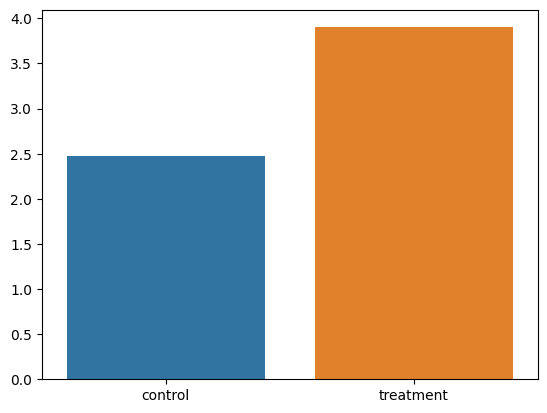

In [276]:
sns.barplot(x=['control','treatment'],y=[cr_control*100,cr_treatment*100])

In [277]:
sample_size = 769

In [278]:
z_score = diff/np.sqrt((cr_control*(1-cr_control))/sample_size)
z_score

2.555338409284554

In [279]:
z_crit = stats.norm.ppf(1-alpha)
z_crit

1.6448536269514722

In [280]:
p_value = 1-stats.norm.cdf(z_score)
p_value

0.005304230228361795

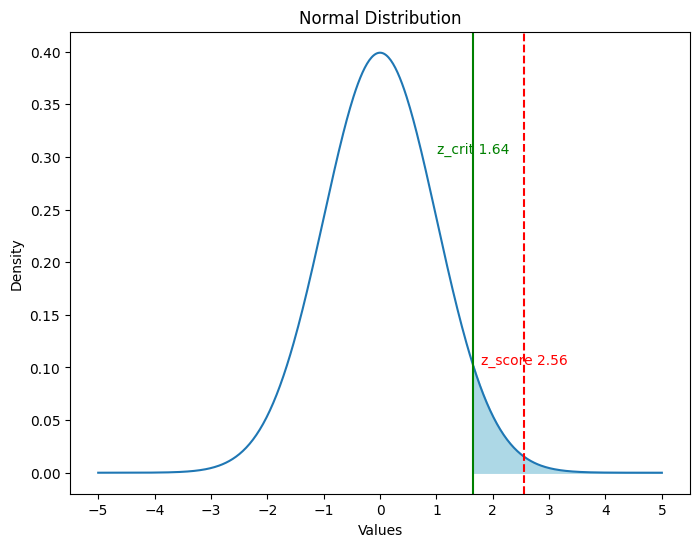

In [281]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
mean = 0
std = 1

x = np.linspace(-5, 5, 500)

y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

sns.lineplot(x=x, y=y)


# Add a vertical line z_score
plt.axvline(x=z_score, color='red', linestyle='--')
# Add label to the vertical line z_score
label = f'z_score {z_score:.2f}'
plt.text(z_score, 0.1, label, va='bottom', ha='center', color='red')

#add a vertical line z_crit
plt.axvline(x=z_crit, color='green', linestyle='-')
# Add label to the vertical line z_crit
label = f'z_crit {z_crit:.2f}'
plt.text(z_crit, 0.3, label, va='bottom', ha='center', color='green')

filt_idx_r=[idx for idx, value in enumerate(x) if value>=z_crit]
plt.fill_between(x[filt_idx_r], y[filt_idx_r],color ='lightblue')


plt.title('Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-5, 6, 1))

plt.show()

In [282]:
print(f'p-value: {p_value:.2f}')
if p_value < alpha:
    print("reject null hypothesis, treatment are greater than the control")
else:
    print("accept h0, the difference is not significant")

p-value: 0.01
reject null hypothesis, treatment are greater than the control


# 6. Conclusion & Recomendation

- Pada uji hipotesisi, terlihat bahwa adanya perbedaan yang terlihat antara grup treatment dan grup control, sehingga iklan diterima dengan baik oleh sebagian pelanggan pada kelompok treatment.